In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

bike_rentals = pd.read_csv("bike_rental_hour.csv")
bike_rentals

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


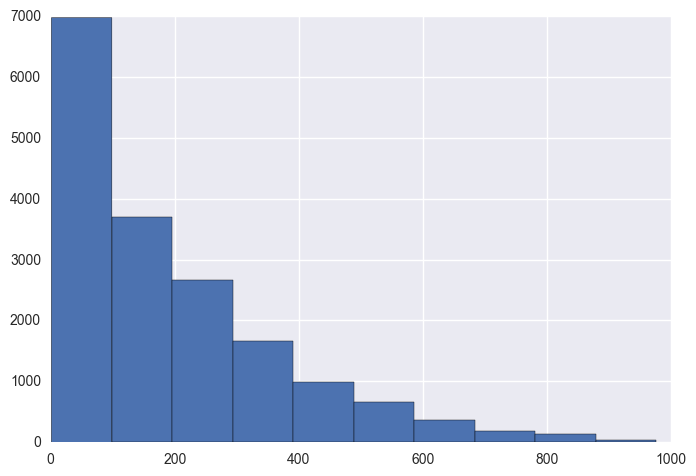

mean and std 189.46308763450142 181.38759909186527


In [3]:
plt.hist(bike_rentals["cnt"])
plt.show()
print("mean and std",bike_rentals["cnt"].mean(), bike_rentals["cnt"].std())

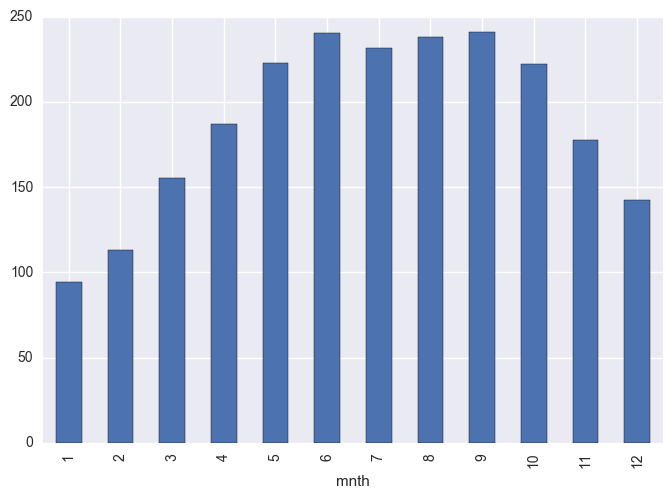

In [15]:
bike_rentals.groupby("mnth").mean()["cnt"].plot(kind="bar")
plt.show()


# Month wise rental
The months from May till October have an average monthly rental of bikes greater than 200. This was to be expected as during summers people are more inclined to use bikes whereas in Winters it becomes difficult to travel while being exposed to harsh elements.

In [18]:
corelations = bike_rentals.corr()
corelations["cnt"]

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [19]:
def assign_label(hour):
    if hour < 12 and hour >= 6:
        return 1
    elif hour < 18 and hour >=12:
        return 2
    elif hour <24 and hour >= 18:
        return 3
    elif hour >= 0 and hour < 6:
        return 4

bike_rentals["time_label"] = bike_rentals["hr"].apply(assign_label)
bike_rentals["time_label"].head()

0    4
1    4
2    4
3    4
4    4
Name: time_label, dtype: int64

# Error metric
The mean squared error metric makes the most sense to evaluate our error. MSE works on continuous numeric data, which fits our data quite well.

In [20]:
train = bike_rentals.sample(frac=0.8)
test = bike_rentals[~bike_rentals.index.isin(train.index)]

In [21]:
cols = list(bike_rentals.columns)
cols.remove("cnt")
cols.remove("casual")
cols.remove("dteday")
cols.remove("registered")
cols

['instant',
 'season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'time_label']

In [22]:
from sklearn.linear_model import LinearRegression
import numpy as np
lr = LinearRegression()
lr.fit(train[cols], train["cnt"])
predictions_lr = lr.predict(test[cols])

mse_lr = ((predictions_lr - test["cnt"])**2).mean()
print("mean squared error for Linear Regression = ",mse_lr)
root_mse = mse_lr**(1/2)
print("Root Mean Squared Error = ", root_mse)

mean squared error for Linear Regression =  16992.248191430568
Root Mean Squared Error =  130.3543178856403


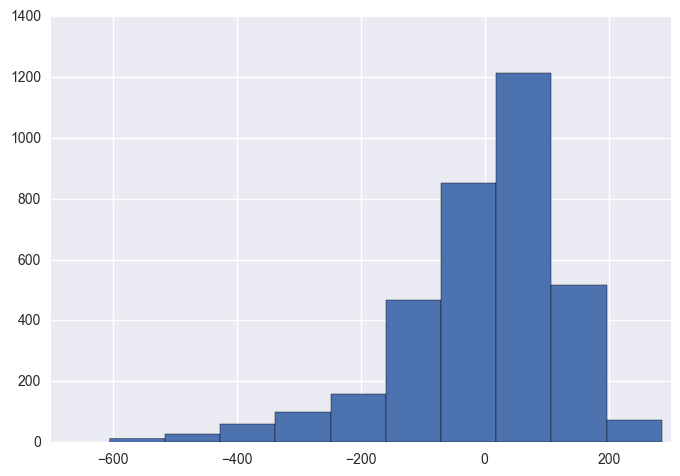

In [23]:
plt.hist(predictions_lr - test["cnt"])
plt.show()

# Error
The error is very high, which may be due to the fact that the data has a few extremely high rental counts, but otherwise mostly low counts. Larger errors are penalized more with MSE, which leads to a higher total error.

In [28]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(min_samples_leaf = 5)
tree.fit(train[cols], train["cnt"])
predictions_tree_5 = tree.predict(test[cols])

mse_tree = ((predictions_tree_5 - test["cnt"])**2).mean()
print("mean squared error for Decision Tree = ",mse_tree)
root_mse_tree = mse_tree**(1/2)
print("Root mean squared error for Decision Tree = ", root_mse_tree)

mean squared error for Decision Tree =  2761.141879910125
Root mean squared error for Decision Tree =  52.54656867874557


# Decision tree error
By taking the nonlinear predictors into account, the decision tree regressor appears to have much higher accuracy than linear regression.

In [25]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(min_samples_leaf = 2)
forest.fit(train[cols], train["cnt"])
predictions_forest_2 = forest.predict(test[cols])



In [27]:
mse_forest =((predictions_forest_2 - test["cnt"])**2).mean()
print("mean squared error for Random Forest = ",mse_forest)
root_mse_forest = mse_forest**(1/2)
print("Root mean squared error for Random Forest: ", root_mse_forest)

mean squared error for Random Forest =  2052.0886502578674
Root mean squared error for Random Forest:  45.299985102181516


# Random forest error
By removing some of the sources of overfitting, the random forest accuracy is improved over the decision tree accuracy. The rmse is 45.3 which is significantly less than the standard deviation of 181.4 in the number of bikes rented per day.